In [1]:
import os
import sys
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split

import sys
sys.path.append(os.path.abspath(os.path.join('..')))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from src.models.dl_models import MLPModel,LSTMModel,CNNModel
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Evaluación del conjunto de pruebas

In [2]:
project_root = os.path.dirname(os.getcwd())
models_path = os.path.join(project_root,'models')

results_path = models_path +'/results'

In [3]:
df_cv_temp = pd.read_csv(results_path+ '/resultados_cv_temporales.csv')
df_cv_spec = pd.read_csv(results_path+ '/resultados_cv_espectrales.csv')

In [33]:
df_cv_temp.iloc[:, :-1]

,Modelo,F1-score,Balanced accuracy,Accuracy,ROC-AUC,Tiempo promedio (s),Tiempo total (s)
0,RandomForest,0.957794,0.938660,0.958400,0.996710,4.748755,33.241286
1,KNN,0.910487,0.833977,0.912793,0.972734,0.118261,0.827826
2,SVM,0.868703,0.798637,0.877896,0.976741,7.976255,55.833782
3,MLP,0.883080,0.821791,0.888096,0.979323,3.874286,27.120000
4,LSTM,0.892065,0.844902,0.896401,0.981841,5.918695,41.430868
5,CNN,0.935579,0.908011,0.935670,0.993699,14.641942,102.493594


In [34]:
df_cv_spec.iloc[:, :-1]

,Modelo,F1-score,Balanced accuracy,Accuracy,ROC-AUC,Tiempo promedio (s),Tiempo total (s)
0,RandomForest,0.924124,0.884841,0.927509,0.993042,20.201603,141.411223
1,KNN,0.836343,0.792084,0.842707,0.934194,0.252207,1.765446
2,SVM,0.681787,0.610594,0.753898,0.912817,79.474744,556.323209
3,MLP,0.869076,0.809721,0.876876,0.975521,4.251311,29.759180
4,LSTM,0.572299,0.468346,0.631573,0.838423,6.925758,48.480303
5,CNN,0.877132,0.862837,0.870836,0.987457,142.659855,998.618983


In [6]:
df_test_temp = pd.read_csv(results_path+ '/resultados_test_temporales.csv')
df_test_spec = pd.read_csv(results_path+ '/resultados_test_espectrales.csv')

In [7]:
df_test_temp

,Modelo,F1-score,Balanced accuracy,Accuracy,ROC-AUC,Tiempo entrenamiento (s),Tiempo predicción (s),Tiempo total (s),Archivo
0,RandomForest,0.958805,0.934855,0.959790,0.997051,5.619681,0.079061,5.703132,randomforest_features_temporales.pkl
1,KNN,0.918273,0.848871,0.919872,0.978106,0.002294,0.270956,0.277279,knn_features_temporales.pkl
2,SVM,0.880890,0.817746,0.888695,0.977431,9.473007,1.525936,11.004270,svm_features_temporales.pkl
3,MLP,0.889957,0.827131,0.895688,0.982609,4.386423,0.035186,4.421608,mlp_features_temporales.pth
4,LSTM,0.893686,0.836958,0.900350,0.984916,6.954943,0.052340,7.007283,lstm_features_temporales.pth
5,CNN,0.943553,0.924238,0.942890,0.993440,14.611942,0.084339,14.696281,cnn_features_temporales.pth


In [8]:
df_test_spec

,Modelo,F1-score,Balanced accuracy,Accuracy,ROC-AUC,Tiempo entrenamiento (s),Tiempo predicción (s),Tiempo total (s),Archivo
0,RandomForest,0.937376,0.904040,0.939977,0.994127,24.256878,0.135329,24.396585,randomforest_features_espectrales.pkl
1,KNN,0.845333,0.800851,0.851107,0.942559,0.018206,0.479198,0.501435,knn_features_espectrales.pkl
2,SVM,0.696941,0.625412,0.768065,0.914127,101.440645,10.823589,112.269375,svm_features_espectrales.pkl
3,MLP,0.856498,0.804610,0.874709,0.978361,5.547061,0.040944,5.588005,mlp_features_espectrales.pth
4,LSTM,0.680051,0.541895,0.743590,0.887498,9.493092,0.082048,9.575140,lstm_features_espectrales.pth
5,CNN,0.945629,0.934860,0.944347,0.994599,152.097687,0.849152,152.946839,cnn_features_espectrales.pth


## Análisis de confusiones frecuentes entre clases y visualización de ejemplos clasificados correctamente e incorrectamente

- y_temp_test: etiquetas verdaderas
- y_temp_pred: predicciones del modelo
- X_temp_test: features del test

In [9]:
project_root = os.path.dirname(os.getcwd())
data_path = os.path.join(project_root, 'data')
processed_path = data_path + '/processed'

save_models_path = os.path.join(project_root, 'models', 'save_models')
save_results_path = os.path.join(project_root, 'models', 'results')

features_temporal = pd.read_csv(processed_path + '/features_temporales_labelNum_overlap50.csv')
features_espectrales = pd.read_csv(processed_path + '/features_espectrales_labelNum_overlap50.csv')

X_temp = features_temporal.iloc[:, 1:-1] 
y_temp = features_temporal.iloc[:, -1]  
X_spec = features_espectrales.iloc[:, 1:-1] 
y_spec = features_espectrales.iloc[:, -1]  

# Dividir el dataset en entrenamiento y prueba
X_temp_train, X_temp_test, y_temp_train, y_temp_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)
X_spec_train, X_spec_test, y_spec_train, y_spec_test = train_test_split(X_spec, y_spec, test_size=0.2, random_state=42)

In [10]:
def confusion_matrix_models(y_test, y_pred, title):
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', xticks_rotation=45)
    plt.title(title)
    plt.show

In [11]:
def ejemplos_clasificados(y_type_test, y_type_pred, type, model):
    print(f'Ejemplos clasificados de {model} - {type}',)
    correct_idx_type = np.where(y_type_test == y_type_pred)[0]
    incorrect_idx_type = np.where(y_type_test != y_type_pred)[0]
    
    print("\nClasificados correctamente:")
    display(pd.DataFrame({
        'Index': y_type_test.index[correct_idx_type],
        'True': y_type_test.values[correct_idx_type],
        'Pred': y_type_pred[correct_idx_type]
    }).head(5))

    print("\nClasificados incorrectamente:")
    display(pd.DataFrame({
        'Index': y_type_test.index[incorrect_idx_type],
        'True': y_type_test.values[incorrect_idx_type],
        'Pred': y_type_pred[incorrect_idx_type]
    }).head(5))


### Random forest

In [12]:
rf_temp = joblib.load(save_models_path + '/randomforest_features_temporales.pkl')
rf_spec = joblib.load(save_models_path + '/randomforest_features_espectrales.pkl')

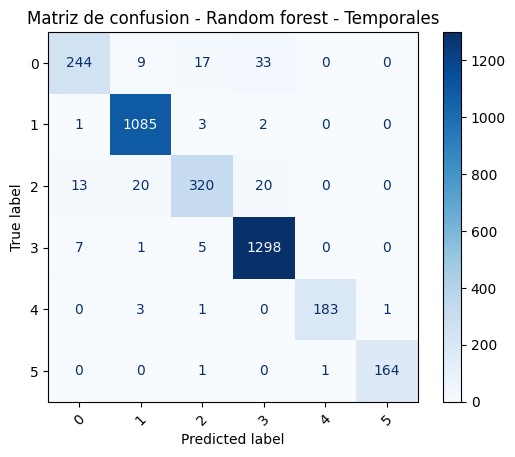

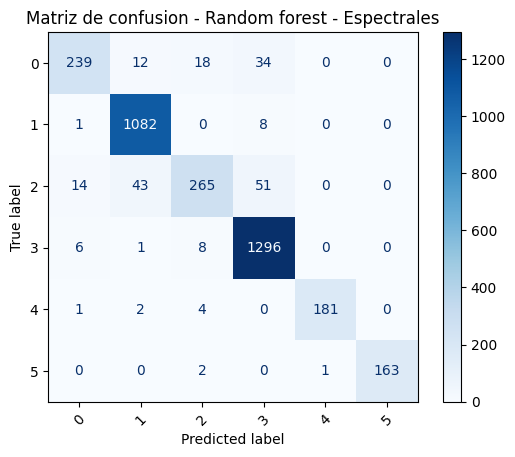

In [13]:
y_temp_pred = rf_temp.predict(X_temp_test)
y_spec_pred = rf_spec.predict(X_spec_test)

confusion_matrix_models(y_temp_test, y_temp_pred, "Matriz de confusion - Random forest - Temporales")
confusion_matrix_models(y_spec_test, y_spec_pred, "Matriz de confusion - Random forest - Espectrales")

In [14]:
ejemplos_clasificados(y_temp_test, y_temp_pred, "temporales", "Random forest")
ejemplos_clasificados(y_spec_test, y_spec_pred, "espectrales", "Random forest")

Ejemplos clasificados de Random forest - temporales

Clasificados correctamente:


,Index,True,Pred
0,13170,1,1
1,2751,2,2
2,744,3,3
3,12907,3,3
4,15729,3,3



Clasificados incorrectamente:


,Index,True,Pred
0,9180,4,5
1,4351,0,2
2,7346,1,2
3,3821,0,3
4,2270,2,3


Ejemplos clasificados de Random forest - espectrales

Clasificados correctamente:


,Index,True,Pred
0,13170,1,1
1,744,3,3
2,12907,3,3
3,15729,3,3
4,8620,3,3



Clasificados incorrectamente:


,Index,True,Pred
0,2751,2,3
1,9180,4,0
2,4351,0,3
3,7346,1,0
4,12495,2,1


### KNN

In [15]:
knn_temp = joblib.load(save_models_path + '/knn_features_temporales.pkl')
knn_spec = joblib.load(save_models_path + '/knn_features_espectrales.pkl')

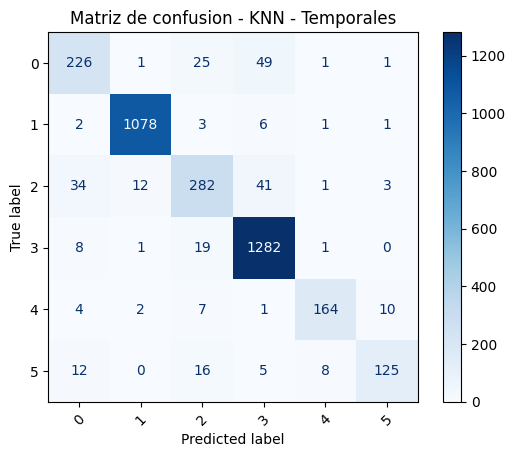

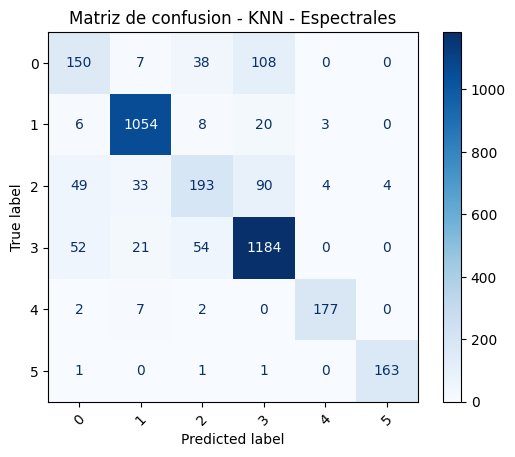

In [16]:
y_temp_pred = knn_temp.predict(X_temp_test)
y_spec_pred = knn_spec.predict(X_spec_test)

confusion_matrix_models(y_temp_test, y_temp_pred, "Matriz de confusion - KNN - Temporales")
confusion_matrix_models(y_spec_test, y_spec_pred, "Matriz de confusion - KNN - Espectrales")

In [17]:
ejemplos_clasificados(y_temp_test, y_temp_pred, "temporales", "KNN")
ejemplos_clasificados(y_spec_test, y_spec_pred, "espectrales", "KNN")

Ejemplos clasificados de KNN - temporales

Clasificados correctamente:


,Index,True,Pred
0,13170,1,1
1,744,3,3
2,12907,3,3
3,15729,3,3
4,8620,3,3



Clasificados incorrectamente:


,Index,True,Pred
0,2751,2,3
1,4058,5,2
2,9180,4,5
3,4351,0,2
4,7346,1,2


Ejemplos clasificados de KNN - espectrales

Clasificados correctamente:


,Index,True,Pred
0,13170,1,1
1,2751,2,2
2,12907,3,3
3,15729,3,3
4,8620,3,3



Clasificados incorrectamente:


,Index,True,Pred
0,744,3,2
1,9180,4,2
2,4110,2,0
3,16049,2,0
4,4351,0,3


### SVM

In [18]:
svm_temp = joblib.load(save_models_path + '/svm_features_temporales.pkl')
svm_spec = joblib.load(save_models_path + '/svm_features_espectrales.pkl')

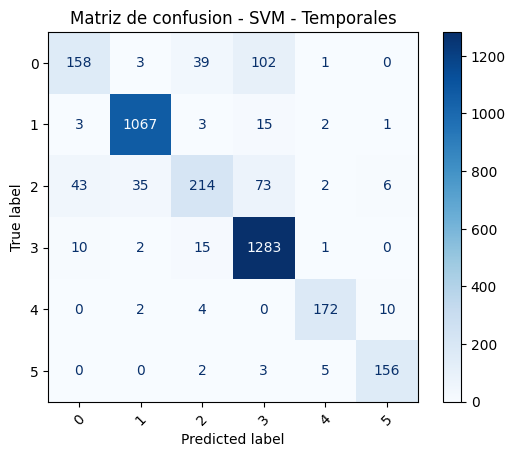

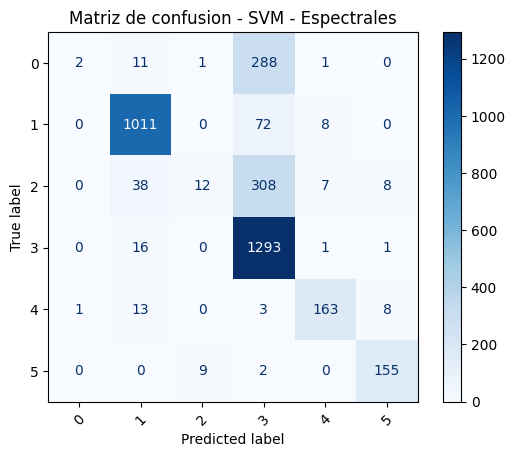

In [19]:
y_temp_pred = svm_temp.predict(X_temp_test)
y_spec_pred = svm_spec.predict(X_spec_test)

confusion_matrix_models(y_temp_test, y_temp_pred, "Matriz de confusion - SVM - Temporales")
confusion_matrix_models(y_spec_test, y_spec_pred, "Matriz de confusion - SVM - Espectrales")

In [20]:
ejemplos_clasificados(y_temp_test, y_temp_pred, "temporales", "SVM")
ejemplos_clasificados(y_spec_test, y_spec_pred, "espectrales", "SVM")

Ejemplos clasificados de SVM - temporales

Clasificados correctamente:


,Index,True,Pred
0,13170,1,1
1,744,3,3
2,12907,3,3
3,15729,3,3
4,8620,3,3



Clasificados incorrectamente:


,Index,True,Pred
0,2751,2,3
1,9180,4,5
2,4351,0,2
3,16671,0,2
4,7346,1,2


Ejemplos clasificados de SVM - espectrales

Clasificados correctamente:


,Index,True,Pred
0,13170,1,1
1,744,3,3
2,12907,3,3
3,15729,3,3
4,8620,3,3



Clasificados incorrectamente:


,Index,True,Pred
0,2751,2,3
1,9180,4,5
2,5267,3,1
3,5377,0,3
4,12189,0,3


### MLP

In [21]:
mlp_temp = MLPModel(input_size=X_temp_train.shape[1], num_classes=6).to(device)
mlp_spec = MLPModel(input_size=X_spec_train.shape[1], num_classes=6).to(device)

In [22]:
mlp_temp.load_state_dict(torch.load(save_models_path+'/mlp_features_temporales.pth', map_location='cpu'))
mlp_temp.eval()

with torch.no_grad():
    X_tensor = torch.FloatTensor(X_temp_test.values)
    outputs = mlp_temp(X_tensor)
    y_temp_pred = outputs.argmax(dim=1).numpy()
    
    
mlp_spec.load_state_dict(torch.load(save_models_path+'/mlp_features_espectrales.pth', map_location='cpu'))
mlp_spec.eval()

with torch.no_grad():
    X_tensor = torch.FloatTensor(X_spec_test.values)
    outputs = mlp_spec(X_tensor)
    y_spec_pred = outputs.argmax(dim=1).numpy()

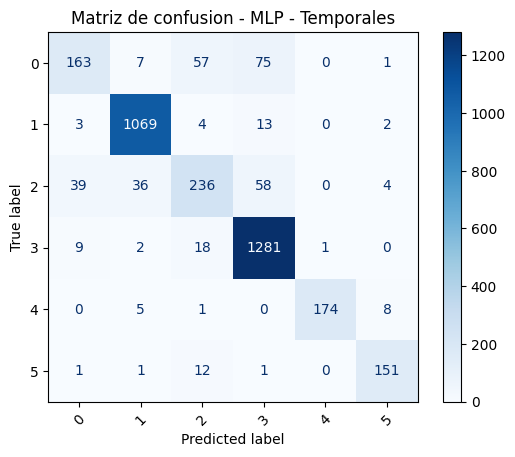

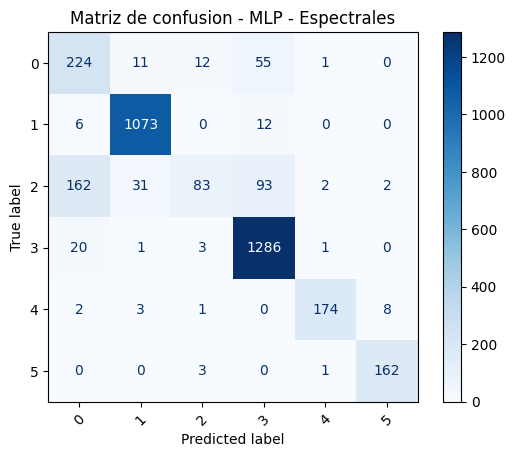

In [23]:
confusion_matrix_models(y_temp_test, y_temp_pred, "Matriz de confusion - MLP - Temporales")
confusion_matrix_models(y_spec_test, y_spec_pred, "Matriz de confusion - MLP - Espectrales")

In [24]:
ejemplos_clasificados(y_temp_test, y_temp_pred, "temporales", "MLP")
ejemplos_clasificados(y_spec_test, y_spec_pred, "espectrales", "MLP")

Ejemplos clasificados de MLP - temporales

Clasificados correctamente:


,Index,True,Pred
0,13170,1,1
1,12907,3,3
2,15729,3,3
3,8620,3,3
4,4058,5,5



Clasificados incorrectamente:


,Index,True,Pred
0,2751,2,3
1,744,3,2
2,9180,4,5
3,16049,2,3
4,4351,0,2


Ejemplos clasificados de MLP - espectrales

Clasificados correctamente:


,Index,True,Pred
0,13170,1,1
1,744,3,3
2,12907,3,3
3,15729,3,3
4,8620,3,3



Clasificados incorrectamente:


,Index,True,Pred
0,2751,2,3
1,9180,4,2
2,4110,2,0
3,16049,2,3
4,4351,0,3


### LSTM

In [25]:
lstm_temp = LSTMModel(input_size=X_temp_train.shape[1], num_classes=len(np.unique(y_temp_train))).to(device)
lstm_spec = LSTMModel(input_size=X_spec_train.shape[1], num_classes=len(np.unique(y_spec_train))).to(device)

In [26]:
lstm_temp.load_state_dict(torch.load(save_models_path+'/lstm_features_temporales.pth', map_location='cpu'))
lstm_temp.eval()

with torch.no_grad():
    # Para temporales
    X_tensor = torch.FloatTensor(X_temp_test.values).unsqueeze(1)  # (batch, 1, features)
    outputs = lstm_temp(X_tensor)
    y_temp_pred = outputs.argmax(dim=1).numpy()
    
    
lstm_spec.load_state_dict(torch.load(save_models_path+'/lstm_features_espectrales.pth', map_location='cpu'))
lstm_spec.eval()

with torch.no_grad():
    # Para espectrales
    X_tensor = torch.FloatTensor(X_spec_test.values).unsqueeze(1)
    outputs = lstm_spec(X_tensor)
    y_spec_pred = outputs.argmax(dim=1).numpy()

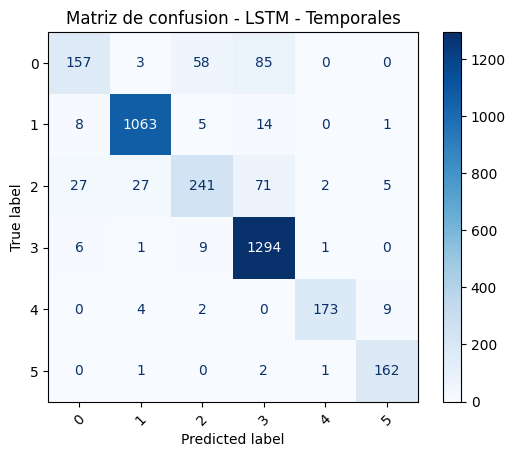

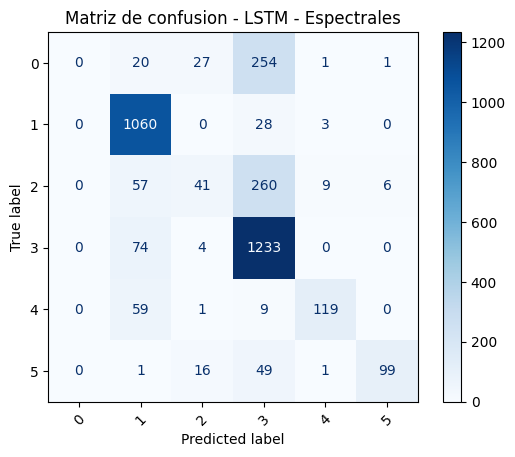

In [27]:
confusion_matrix_models(y_temp_test, y_temp_pred, "Matriz de confusion - LSTM - Temporales")
confusion_matrix_models(y_spec_test, y_spec_pred, "Matriz de confusion - LSTM - Espectrales")

In [28]:
ejemplos_clasificados(y_temp_test, y_temp_pred, "temporales", "LSTM")
ejemplos_clasificados(y_spec_test, y_spec_pred, "espectrales", "LSTM")

Ejemplos clasificados de LSTM - temporales

Clasificados correctamente:


,Index,True,Pred
0,13170,1,1
1,744,3,3
2,12907,3,3
3,15729,3,3
4,8620,3,3



Clasificados incorrectamente:


,Index,True,Pred
0,2751,2,3
1,9180,4,5
2,16049,2,3
3,4351,0,2
4,7346,1,2


Ejemplos clasificados de LSTM - espectrales

Clasificados correctamente:


,Index,True,Pred
0,13170,1,1
1,744,3,3
2,12907,3,3
3,15729,3,3
4,8620,3,3



Clasificados incorrectamente:


,Index,True,Pred
0,2751,2,3
1,4058,5,3
2,9180,4,3
3,5267,3,1
4,5377,0,3


### CNN

In [29]:
cnn_temp = CNNModel(input_channels=1, num_classes=len(np.unique(y_temp_train)), input_features=X_temp_train.shape[1]).to(device)
cnn_spec = CNNModel(input_channels=1, num_classes=len(np.unique(y_spec_train)), input_features=X_spec_train.shape[1]).to(device)

In [30]:
cnn_temp.load_state_dict(torch.load(save_models_path + '/cnn_features_temporales.pth', map_location='cpu'))
cnn_temp.eval()

with torch.no_grad():
    # Temporales
    X_tensor_temp = torch.FloatTensor(X_temp_test.values).unsqueeze(1)  # (batch, 1, features)
    outputs_temp = cnn_temp(X_tensor_temp)
    y_temp_pred = outputs_temp.argmax(dim=1).numpy()
    

cnn_spec.load_state_dict(torch.load(save_models_path + '/cnn_features_espectrales.pth', map_location='cpu'))
cnn_spec.eval()

with torch.no_grad():
    # Espectrales
    X_tensor_spec = torch.FloatTensor(X_spec_test.values).unsqueeze(1)
    outputs_spec = cnn_spec(X_tensor_spec)
    y_spec_pred = outputs_spec.argmax(dim=1).numpy()

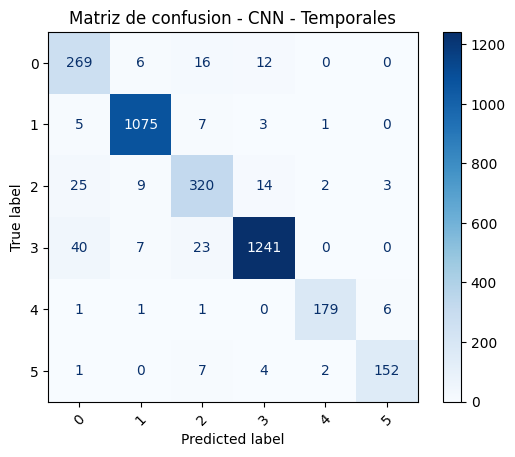

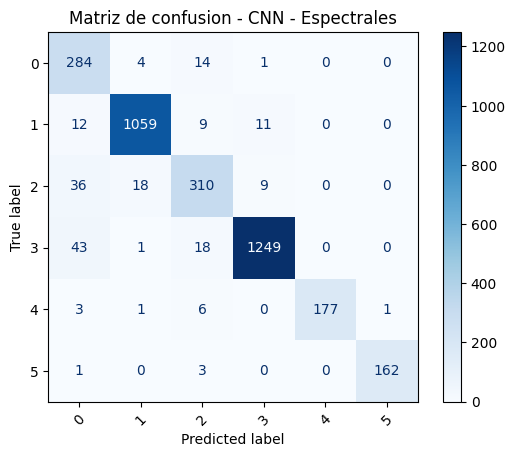

In [31]:
confusion_matrix_models(y_temp_test, y_temp_pred, "Matriz de confusion - CNN - Temporales")
confusion_matrix_models(y_spec_test, y_spec_pred, "Matriz de confusion - CNN - Espectrales")

In [32]:
ejemplos_clasificados(y_temp_test, y_temp_pred, "temporales", "CNN")
ejemplos_clasificados(y_spec_test, y_spec_pred, "espectrales", "CNN")

Ejemplos clasificados de CNN - temporales

Clasificados correctamente:


,Index,True,Pred
0,13170,1,1
1,744,3,3
2,12907,3,3
3,15729,3,3
4,8620,3,3



Clasificados incorrectamente:


,Index,True,Pred
0,2751,2,3
1,9180,4,5
2,16028,5,2
3,5860,3,2
4,7346,1,0


Ejemplos clasificados de CNN - espectrales

Clasificados correctamente:


,Index,True,Pred
0,13170,1,1
1,744,3,3
2,12907,3,3
3,15729,3,3
4,8620,3,3



Clasificados incorrectamente:


,Index,True,Pred
0,2751,2,3
1,9180,4,0
2,12189,0,2
3,7346,1,0
4,664,3,0
